# User's Characteristics of a Bike Share System
## by Maviane Ribeiro

## Investigation Overview

> The main goal of this presentation is showing which are the characteristics of the user's bike share system. We are interested in knowing if these characteristics are changing through the years and if they impact on the duration of the rides.


## Dataset Overview

> After some data points were removed from the analysis due to inconsistencies, missing information and outliers, the dataset contains 8 columns and 3,179,185 entries about the bike rides from 2017 to 2019 (May). There is information about the users and the rides. Most of the time, we'll be working with the users' information. Some data types conversions were needed and columns were created, as `duration_min`, `generations` and `ride_year`. Most of the variables are numeric, followed by string type.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('bikes.csv')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179185 entries, 0 to 3179184
Data columns (total 8 columns):
Unnamed: 0           int64
bike_id              int64
member_birth_year    int64
member_gender        object
user_type            object
duration_min         int64
ride_year            int64
generations          object
dtypes: int64(5), object(3)
memory usage: 194.0+ MB


## Who Are Our Users?

> The main characteristics of the users show they are **male** (74%) **subscribers** (89%) from the **millennials** generation (72%)   
>- Female gender responds for 24% of the users
- Casual customers respond for just 11%
- Silent, Baby Boomers, X, and New Silent generations, all together, represent 28% of them

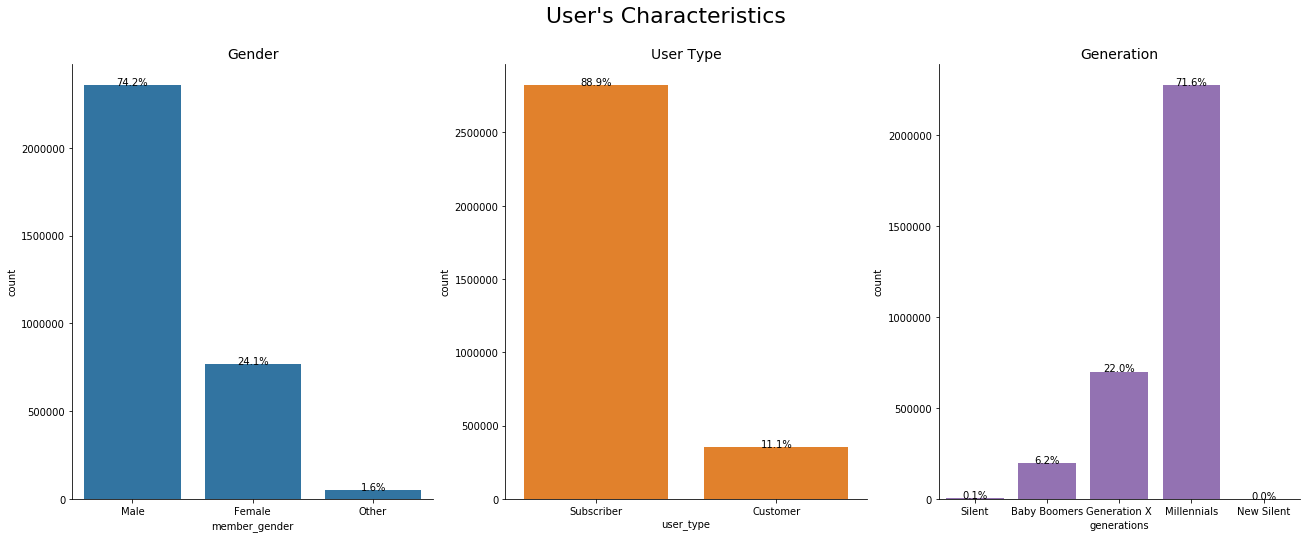

In [118]:
plt.subplots(1, 3, sharey = True, figsize=(22, 8))
plt.suptitle('User\'s Characteristics', fontsize=22);

#first
plt.subplot(1, 3, 1)
cat_order = bikes.member_gender.value_counts().index
# create the member_gender barplot
gender = sb.countplot(data = bikes, x = 'member_gender', color = sb.color_palette()[0], order = cat_order)

# add annotations
n_points = bikes.shape[0]
cat_counts = bikes['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black');
plt.title('Gender', fontsize=14)


#second
plt.subplot(1, 3, 2)
cat_order = bikes.user_type.value_counts().index
utype = sb.countplot(data = bikes, x = 'user_type', color = sb.color_palette()[1], order = cat_order)

# add annotations
n_points = bikes.shape[0]
cat_counts = bikes['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
plt.title('User Type', fontsize=14)


#third
plt.subplot(1, 3, 3)
cat_order = ['Silent', 'Baby Boomers', 'Generation X', 'Millennials', 'New Silent']
generation = sb.countplot(data = bikes, x = 'generations', color = sb.color_palette()[4], order= cat_order)

# add annotations
n_points = bikes.shape[0]
cat_counts = bikes['generations'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')
plt.title('Generation', fontsize=14);


plots = [gender, utype, generation]
for plot in plots:
    plot.spines['right'].set_color('none')
    plot.spines['top'].set_color('none')

## Are They Changing Through the Years?

> In general, the users' composition doesn't seem to change over the years. Throughout the three years analyzed:   
- Male, subscribers and millennials continue to be the prevalent groups within the users   
- Also, the order intragroups haven't been changed:
    - Gender: male, female, other
    - User type: subscriber, customer
    - Generation: Millennials, X, Baby Boomers, Silent, New Silent   
- Except by the distribution of generation which seems has been losing the oldest generation (Silent)

> Important observe is that we haven't seen any significant presence of the youngest generation (New Silent) in any of the years

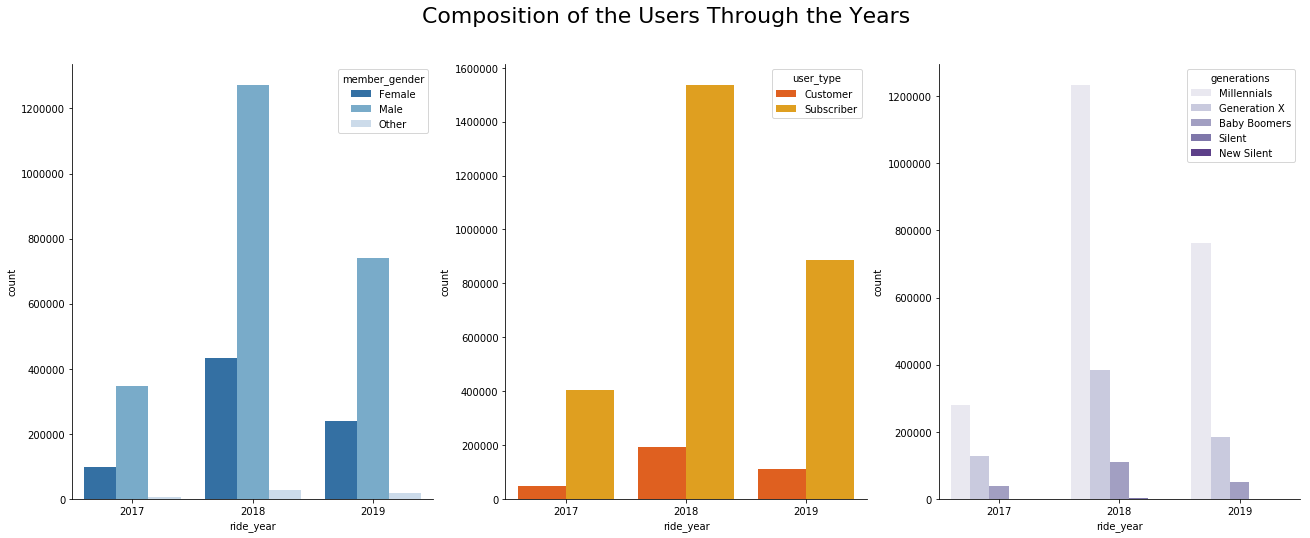

In [137]:
plt.subplots(1, 3, sharey = True, figsize=(22, 8))
plt.suptitle('Composition of the Users Through the Years', fontsize=22);

#first
plt.subplot(1, 3, 1)
gender = sb.countplot(data = bikes, x = 'ride_year', hue = 'member_gender', palette = "Blues_r")

#second
plt.subplot(1, 3, 2)
utype = sb.countplot(data = bikes, x = 'ride_year', hue = 'user_type', palette = "autumn")

#third
plt.subplot(1, 3, 3)
generation = sb.countplot(data = bikes, x = 'ride_year', hue = 'generations', palette = "Purples");

plots = [gender, utype, generation]
for plot in plots:
    plot.spines['right'].set_color('none')
    plot.spines['top'].set_color('none');

## Do These Characteristics Impact the Duration of the Rides?

> - Gender:
    - Gender doesn't seem to make a huge difference in the duration of the rides. Their medians don't vary much
    - However, it's possible to see that female's rides tend to be a little bit longer than the male's
    - The difference is about 2 minutes

> - User type:
    - Casual customers tend to take longer rides, while the subscribers shorter
    - The difference is about 8 minutes
    - However, the subscribers take more rides than casual costumers

## Do These Characteristics Impact the Duration of the Rides?

> - Generation:
    - Not much variation was observed
    - Except for the New Silent generation, the youngest ones
        - They tend to take longer rides than the others, showing a higher variance
        - The difference is around the double (12 minutes+)
        - However, there is a weak presence of them within the users

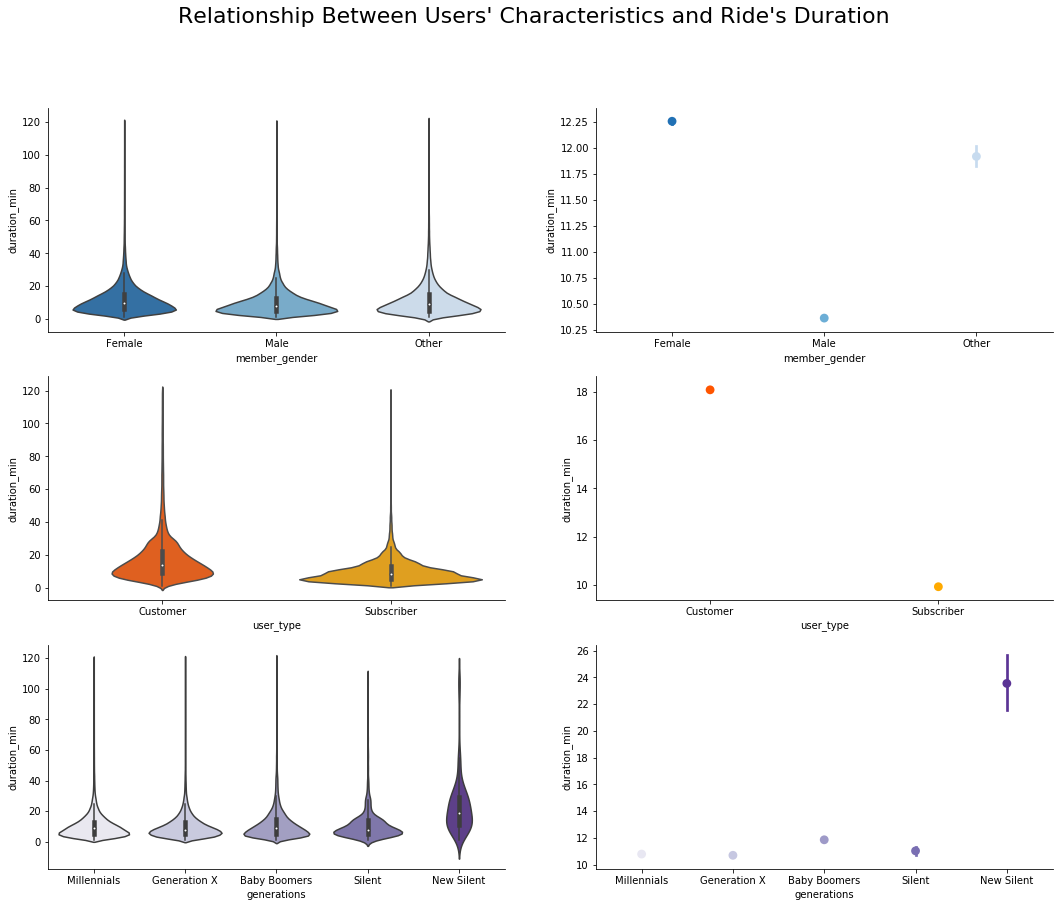

In [138]:
plt.subplots(3, 2, figsize=(18, 14))
plt.suptitle('Relationship Between Users\' Characteristics and Ride\'s Duration', fontsize=22);

#first plot
plt.subplot(3, 2, 1)
gender = sb.violinplot(data = bikes, x = 'member_gender', y = 'duration_min', palette = "Blues_r")

#second plot
plt.subplot(3, 2, 2)
gender_dur = sb.pointplot(data = bikes, x= 'member_gender', y = 'duration_min', palette = "Blues_r")

#third plot
plt.subplot(3, 2, 3)
utype = sb.violinplot(data = bikes, x = 'user_type', y = 'duration_min', palette = "autumn")

#fourth plot
plt.subplot(3, 2, 4)
utype_dur = sb.pointplot(data = bikes, x= 'user_type', y = 'duration_min', palette = "autumn")


#fifth plot
plt.subplot(3, 2, 5)
generation = sb.violinplot(data = bikes, x = 'generations', y = 'duration_min', palette = "Purples")

#sixth plot
plt.subplot(3, 2, 6)
generation_dur = sb.pointplot(data = bikes, x= 'generations', y = 'duration_min', palette = "Purples")

plots = [gender, gender_dur, utype, utype_dur, generation, generation_dur]
for plot in plots:
    plot.spines['right'].set_color('none')
    plot.spines['top'].set_color('none');

## Final Thoughts

> - Analyzing the users' characteristics was possible to observe that their features tend to be stable through the years, with a prevalence of male, subscribers and millennials generation within the most users of the bike share system analyzed.   
- It would be important that the company reflects about if it's worth developing some strategies to capture users with features little present in the system, like women and the newest generation.   
- Also, about the type of users, it would be interesting to have data about each rides profit to evaluate if it's more profitable have customers with long rides or subscribers with shorter rides. Maybe a balance between them would be desirable.

> To check the output by using nbconvert to export the notebook and set up a server for the slides:
> > `jupyter nbconvert bikes_slide_deck.ipynb --to slides --post serve --template output_toggle`